# 새로운 값 생성

In [1]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/broadcast.csv", index_col = 0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


<Axes: >

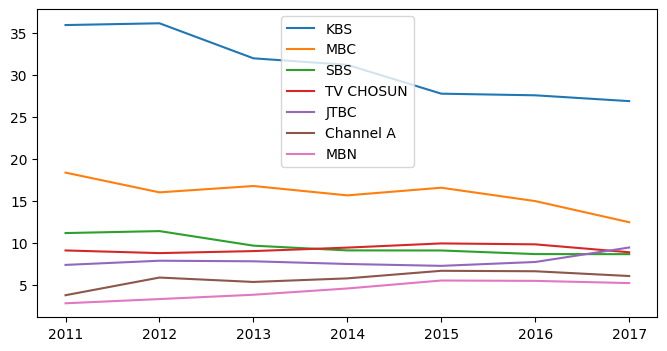

In [3]:
df.plot(figsize = (8, 4))

`-` 컬럼 추가

* 각 해의 전체 방송사의 시청율 더하기

In [4]:
df["total"] = df.sum(axis = 1)

`-` 흠, 시청율은 `OTT`서비스로 인해 절감하는 것을 볼 수 있다.

<Axes: >

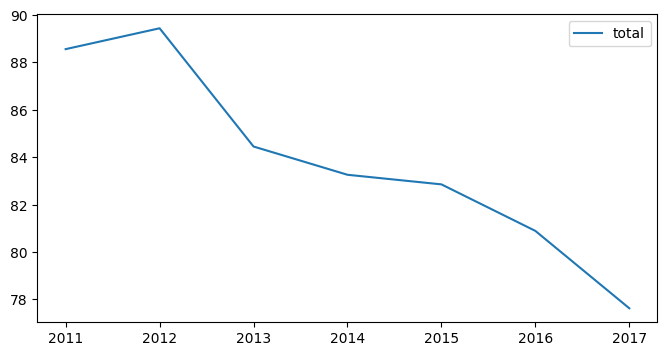

In [5]:
df.plot(y = "total", figsize = (8,4))

`-` 지상파와 종편 시청율 구한 후, 컬럼 추가

In [6]:
df["Group 1"] = df.loc[:, "KBS" : "SBS" ].sum(axis = 1)
df["Group 2"] = df.loc[:, "TV CHOSUN" : "MBN" ].sum(axis = 1)

<Axes: >

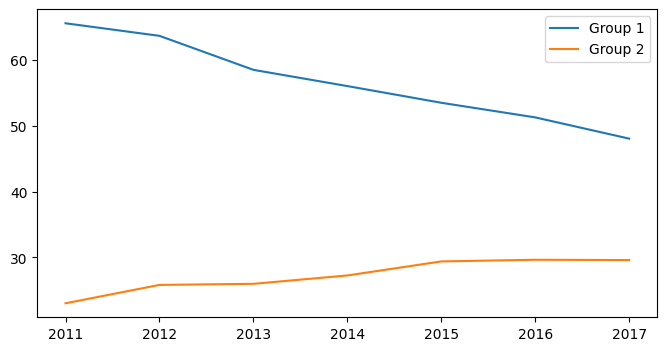

In [7]:
df.plot(y = ["Group 1", "Group 2"], figsize = (8,4))

`-` 아 예전엔 지상파에 인기있는 드라마가 많았는데, 지금은 종편에 재밌는 드라마가 더 많나보다라고 인사이트를 도출할 수 있음

***

# 문자열 필터링

In [8]:
df = pd.read_csv("data/albums.csv")
df.head()

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock


In [9]:
df.Genre.unique()

array(['Rock', 'Rock, Pop', 'Funk / Soul', 'Rock, Blues', 'Jazz',
       'Jazz, Rock, Blues, Folk, World, & Country', 'Funk / Soul, Pop',
       'Blues', 'Pop', 'Rock, Folk, World, & Country',
       'Folk, World, & Country', 'Classical, Stage & Screen', 'Reggae',
       'Hip Hop', 'Jazz, Funk / Soul', 'Rock, Funk / Soul, Pop',
       'Electronic, Rock',
       'Jazz, Rock, Funk / Soul, Folk, World, & Country',
       'Jazz, Rock, Funk / Soul, Pop, Folk, World, & Country',
       'Funk / Soul, Stage & Screen',
       'Electronic, Rock, Funk / Soul, Stage & Screen',
       'Rock, Funk / Soul', 'Rock, Reggae', 'Jazz, Pop',
       'Funk / Soul, Folk, World, & Country', 'Latin, Funk / Soul',
       'Funk / Soul, Blues',
       'Reggae,�Pop,�Folk, World, & Country,�Stage & Screen',
       'Electronic,�Stage & Screen', 'Jazz, Rock, Funk / Soul, Blues',
       'Jazz, Rock', 'Rock, Latin, Funk / Soul', 'Electronic, Rock, Pop',
       'Hip Hop, Rock, Funk / Soul', 'Electronic, Pop',
       'Roc

`-` `blues`관련 앨범만 뽑아보기

* 이전의 방법을 사용하면 정확히 장르가 `Blues`인 앨범만 추출함

In [10]:
df[df["Genre"] == "Blues"]

,Number,Year,Album,Artist,Genre,Subgenre
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
140,141,1965,Live at the Regal,B.B. King,Blues,Chicago Blues
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues
197,198,1967,The Best of Little Walter,Little Walter,Blues,Chicago Blues
237,238,1962,Howlin' Wolf,Howlin' Wolf,Blues,NaN
281,282,1964,Folk Singer,Muddy Waters,Blues,Delta Blues
376,377,1991,The Ultimate Collection: 1948-1990,John Lee Hooker,Blues,"Country Blues, Electric Blues, Chicago Blues, ..."
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


`-` 새로운 방법(`str.contains`) : 해당 단어가 포함된 개체를 모두 출력

In [11]:
df[df["Genre"].str.contains("Blues")].head()

,Number,Year,Album,Artist,Genre,Subgenre
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
14,15,1967,Are You Experienced,The Jimi Hendrix Experience,"Rock, Blues","Blues Rock, Psychedelic Rock"
18,19,1968,Astral Weeks,Van Morrison,"Jazz, Rock, Blues, Folk, World, & Country","Acoustic, Classic Rock, Free Improvisation"
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
48,49,1971,At Fillmore East,The Allman Brothers Band,"Rock, Blues",Blues Rock


`-` 좀더 디테일, `Blues`가 앞에 있는 애들만 필터링

In [12]:
df[df["Genre"].str.startswith("Blues")].head()

,Number,Year,Album,Artist,Genre,Subgenre
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
140,141,1965,Live at the Regal,B.B. King,Blues,Chicago Blues
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues
197,198,1967,The Best of Little Walter,Little Walter,Blues,Chicago Blues
237,238,1962,Howlin' Wolf,Howlin' Wolf,Blues,NaN


`-` `Bluse`장르를 포함여부를 설명하는 컬럼 추가

In [13]:
df["Contains Blue"] = df.Genre.str.contains("Blues")
df.head()

,Number,Year,Album,Artist,Genre,Subgenre,Contains Blue
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",False
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",False
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",False
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",False
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,False


## ex1

`-` 시설명에 '대학'이 포함되어 있으면 '대학', 그렇지 않으면 '일반'으로 나누어 '분류' column에 입력한다.

In [14]:
df.시설명.str.contains?

Object `df.시설명.str.contains` not found.


In [15]:
import warnings

warnings.filterwarnings(action = "ignore")

In [16]:
df = pd.read_csv("data/museum_1.csv")

df["분류"] = df.시설명.str.contains("대학")
df["분류"].replace([False, True], ["일반", "대학"], inplace = True)

In [20]:
df.head()

,시설명,어른관람료,운영기관전화번호,분류
0,필암서원 유물전시관,500,061-390-7224,일반
1,원주역사박물관,0,033-737-4371,일반
2,뮤지엄산미술관,15000,033-730-9000,일반
3,오랜미래신화미술관,0,033-746-5256,일반
4,연세대학교 원주박물관,0,033-760-2731,대학


***

# 문자열 분리

In [78]:
import pandas as pd

df = pd.read_csv("data/parks.csv")
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,전화번호
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438


`-` 관할 구역에 대한 컬럼 생성

* `소재지도로명주소`컬럼에서 맨앞에 관할 구역을 가져와야 한다.

In [79]:
address = df["소재지도로명주소"].str.split(n = 1, expand = True)

df["관할구역"] =  address[0]
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,전화번호,관할구역
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438,광주광역시
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438,광주광역시
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438,광주광역시
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438,광주광역시
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438,광주광역시


***

# 카테고리 분류

In [84]:
df = pd.read_csv("data/museum_3.csv",dtype={'지역번호': str})
df.tail()

,시설명,어른관람료,운영기관전화번호,분류,지역번호
895,함양박물관,0,055-960-5532,일반,55
896,박물관수,5000,053-744-5500,일반,53
897,대구은행금융박물관,0,053-740-2061,일반,53
898,국립대구박물관,0,053-768-6051,일반,53
899,증평민속체험박물관,0,043-835-4161,일반,43


`-` `지역번호` column을 `지역명` 으로 변경

In [85]:
dic = {"2" : "서울시", 
       "31"  : "경기도",
       "32" : "경기도",
       "33" : "강원도", 
       "41" : "충청도", 
       "42" : "충청도",
       "43" : "충청도", 
       "44" : "충청도",
       "51" : "부산시",
       "52" : "경상도",
       "53" : "경상도",
       "54" : "경상도",
       "55" : "경상도",
       "61" : "전라도",
       "62" : "전라도",
       "63" : "전라도",
       "64" : "제주도",
       "1577" : "기타",
       "70" : "기타"
      }

In [87]:
df["지역명"] = df["지역번호"].map(dic)
df.drop("지역번호",axis = 1, inplace = True)

In [89]:
df.head()

,시설명,어른관람료,운영기관전화번호,분류,지역명
0,필암서원 유물전시관,500,061-390-7224,일반,전라도
1,원주역사박물관,0,033-737-4371,일반,강원도
2,뮤지엄산미술관,15000,033-730-9000,일반,강원도
3,오랜미래신화미술관,0,033-746-5256,일반,강원도
4,연세대학교 원주박물관,0,033-760-2731,대학,강원도


# groupby

## ex1. `평균 나이`가 어린 순으로 직업을 나열하기

In [101]:
df = pd.read_csv('data/occupations.csv')

df.groupby("occupation")[["age"]].mean().sort_values("age",ascending = True)

,age
occupation,
student,22.081633
none,26.555556
entertainment,29.222222
artist,31.392857
homemaker,32.571429
programmer,33.121212
technician,33.148148
other,34.523810
scientist,35.548387


## ex2. `여성 비율`이 높은 순으로 직업을 나열

In [171]:
g1 = df.groupby("occupation",as_index = False)["gender"].value_counts(normalize = True)
g1 = g1.loc[g1.gender == "F",["occupation", "proportion"]].sort_values("proportion", ascending = False).set_index("occupation")

g1["proportion"]

occupation
homemaker        0.857143
healthcare       0.687500
librarian        0.568627
artist           0.464286
administrator    0.455696
none             0.444444
writer           0.422222
marketing        0.384615
other            0.342857
student          0.306122
educator         0.273684
salesman         0.250000
lawyer           0.166667
entertainment    0.111111
scientist        0.096774
executive        0.093750
programmer       0.090909
retired          0.071429
technician       0.037037
engineer         0.029851
Name: proportion, dtype: float64

***

# 데이터 합치기

`-` `.merge()` 메소드를 활용해서 `museum_3.csv`에 '지역명' column을 추가

In [199]:
import pandas as pd

museum = pd.read_csv("data/museum_3.csv", dtype={'지역번호': str})
number = pd.read_csv("data/region_number.csv", dtype={'지역번호': str})

In [201]:
museum.merge(number, on = "지역번호", how = "left")

,시설명,어른관람료,운영기관전화번호,분류,지역번호,지역명
0,필암서원 유물전시관,500,061-390-7224,일반,061,전라남도
1,원주역사박물관,0,033-737-4371,일반,033,강원도
2,뮤지엄산미술관,15000,033-730-9000,일반,033,강원도
3,오랜미래신화미술관,0,033-746-5256,일반,033,강원도
4,연세대학교 원주박물관,0,033-760-2731,대학,033,강원도
...,...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,055,경상남도
896,박물관수,5000,053-744-5500,일반,053,대구광역시
897,대구은행금융박물관,0,053-740-2061,일반,053,대구광역시
898,국립대구박물관,0,053-768-6051,일반,053,대구광역시
